# Project Overview

**Project Goal:** Predict house prices using the `train.csv` dataset and evaluate performance on both a separate test file and training/test splits.

**Steps Completed So Far:**
- **Imported necessary libraries** for data analysis, preprocessing, visualization, and modeling.  
- **Exploratory Data Analysis (EDA):** Examined data structure, distribution, and relationships using plots and summaries.  
- **Handled missing values:**  
  - Numeric columns filled with appropriate values.  
  - Categorical columns filled with placeholder or mode.  
- **Separated numerical and categorical features** for preprocessing.  
- **Feature Encoding:**  
  - **One-Hot Encoding** for nominal categorical columns using `OneHotEncoder`, dropping the first category to avoid redundancy.  
- **Train-Test Split:** Dataset split for model evaluation.  
- **Ridge Regression Model:** Trained and evaluated on training and test sets.  
- **Random Forest Regression Model:** Trained, evaluated, and also used to predict values on a separate test file.  
- **Submission File:** Created CSV with `"Id"` and predicted `"SalePrice"` ready for Kaggle submission.  

This project demonstrates complete preprocessing, modeling with Ridge and Random Forest regressors, evaluation on training/test splits and a separate test set, and preparation of a submission file for competition.


# Importing Files and Libraries

In this section, we **import the dataset (`train.csv`)** and the necessary Python libraries for data analysis, preprocessing, and visualization. This sets up the environment for the subsequent data exploration and cleaning steps.

In [1]:
import pandas as pd 
import numpy as np 
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings as wr 

wr.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/house-price/train.csv") # Main File 
test = pd.read_csv("/kaggle/input/house-price/test.csv")  # Test File

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand features, distributions, and patterns, which helps guide data cleaning and modeling.

In [4]:
df.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1070,1071,20,RL,72.0,10152,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,135000


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.shape

(1460, 81)

In [7]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.describe(include="float64")

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [11]:
df.describe(include="int64")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Handling Duplicated Values

We check for **duplicated rows** in the dataset and remove them to ensure data quality.  
This step prevents redundancy and potential bias in the modeling process.

In [13]:
duplicate_value = df.duplicated()
df = df.drop_duplicates()
duplicate_value.sum()

0

In [14]:
df.drop(['Id'], axis=1, inplace=True)

# Handling Missing Values

- **Drop columns** with more than 50% missing values.
- **Numeric columns**: fill missing values with the **median**.
- **Categorical columns**: fill missing values with the **mode**.
- These steps ensure the dataset is clean and ready for analysis.

In [15]:
missing_percent = (df.isnull().sum() / len(df)) * 100 
print(missing_percent)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64


In [16]:
drop_columns= missing_percent[missing_percent > 50].index

numeric_columns = df.select_dtypes(include= ["int64", "float64"]).columns
for col in numeric_columns : 
    df[col].fillna(df[col].median(), inplace=True)

print(df[numeric_columns].isnull().sum()) 

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns :
    df[col].fillna(df[col].mode()[0], inplace=True)

# Visualize Data

In this section, I tried using different types of plots to better understand the relationships between columns.  
Each plot provides a different perspective on the data, helping to reveal patterns and insights.

In [18]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

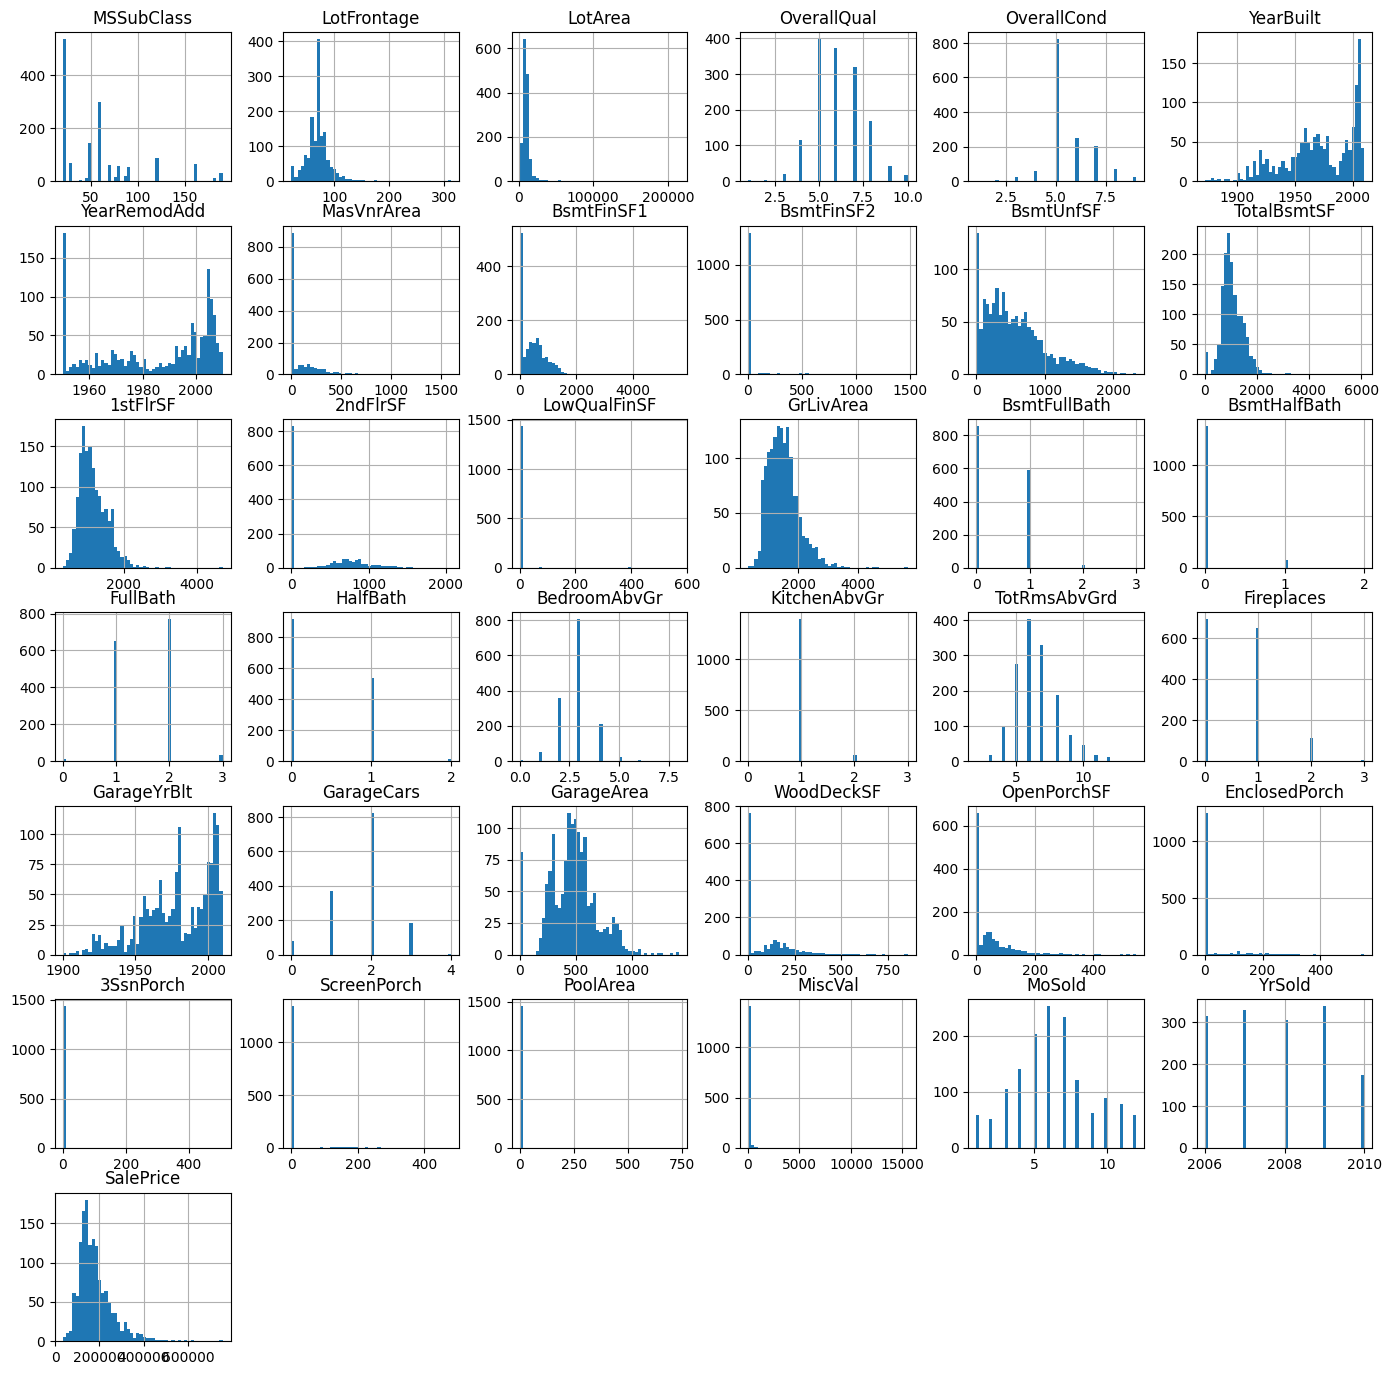

In [19]:
df.hist(bins=50, figsize=(17, 17))
plt.show()

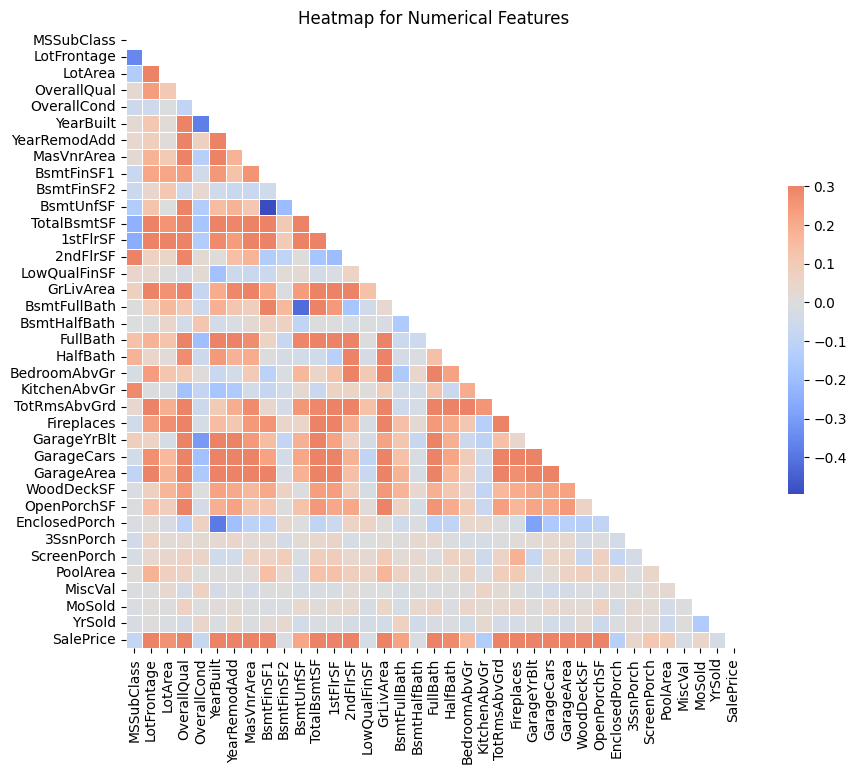

In [20]:
df_num = df.select_dtypes(include=["float64", "int64"])

corr = df_num.corr() 

mask = np.triu(corr) # Mask upper triangle

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr, 
    mask=mask, 
    cmap="coolwarm", 
    vmax=.3, center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)
plt.title("Heatmap for Numerical Features")
plt.show()


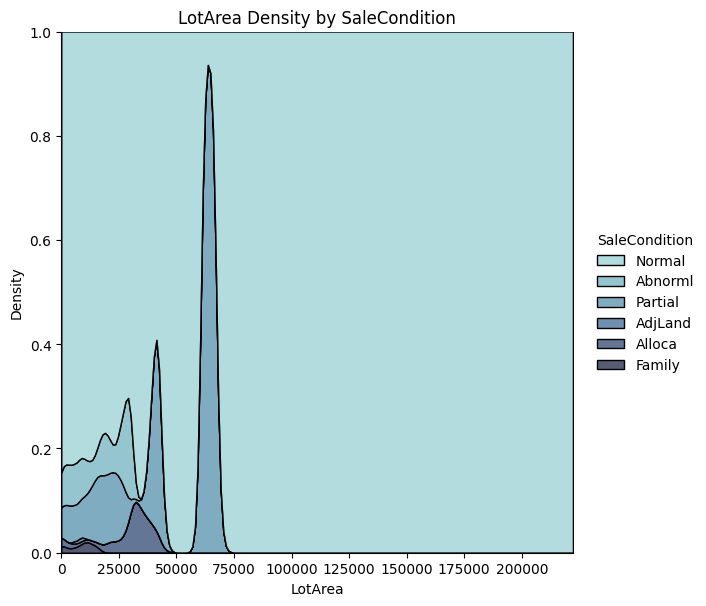

In [21]:
sns.displot(
    data=df,
    x="LotArea",            
    hue="SaleCondition",    
    kind="kde",            
    height=6,              
    multiple="fill",       
    clip=(0, None),         
    palette="ch:rot=-.25,hue=1,light=.75"  
)
plt.title("LotArea Density by SaleCondition")  
plt.show()

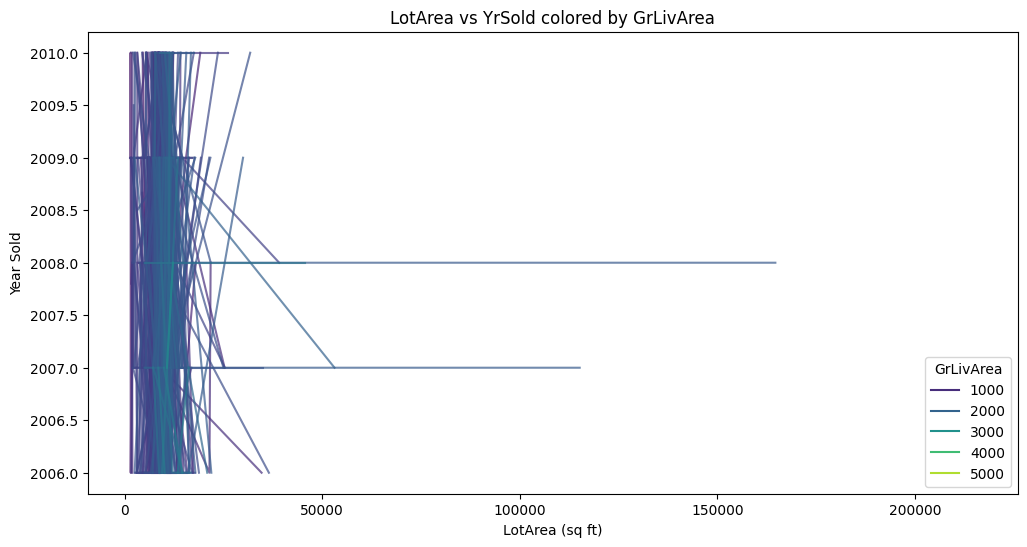

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="LotArea",
    y="YrSold",
    hue="GrLivArea",
    palette="viridis",     
    alpha=0.7            
)
plt.title("LotArea vs YrSold colored by GrLivArea")
plt.xlabel("LotArea (sq ft)")
plt.ylabel("Year Sold")
plt.legend(title="GrLivArea")
plt.show()

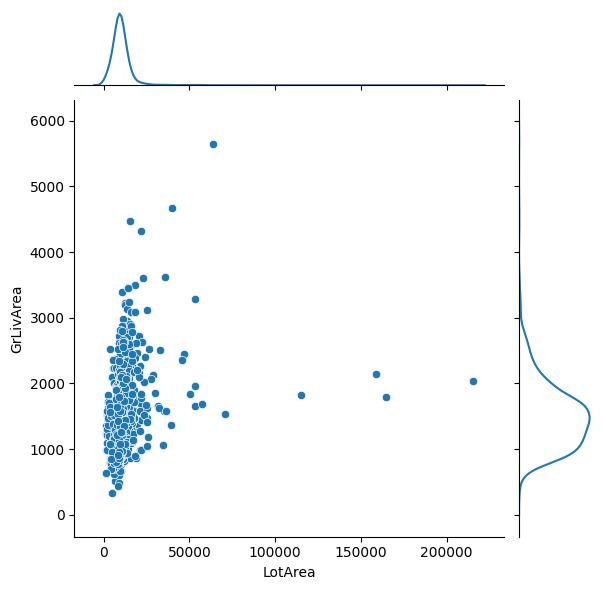

In [23]:
g = sns.JointGrid(data=df, x="LotArea", y="GrLivArea", height=6)
g.plot(sns.scatterplot, sns.kdeplot)
plt.show()

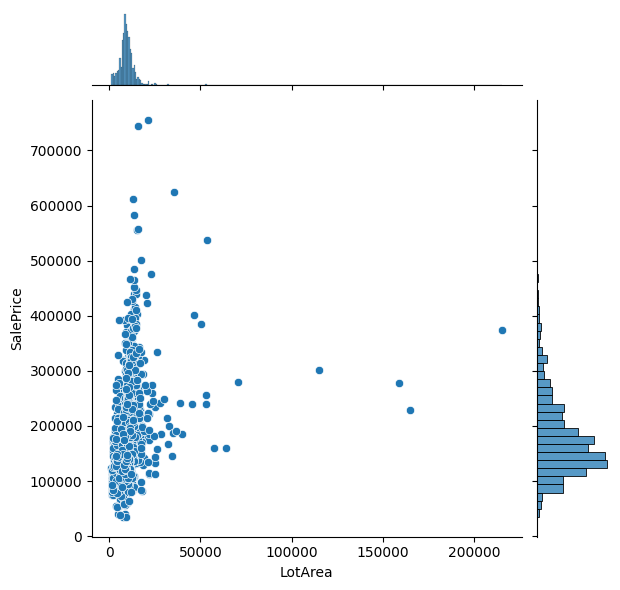

In [24]:
g = sns.JointGrid(
    data=df,        
    x="LotArea",      
    y="SalePrice",   
    height=6,      
)
g.plot(sns.scatterplot, sns.histplot)  

plt.show()

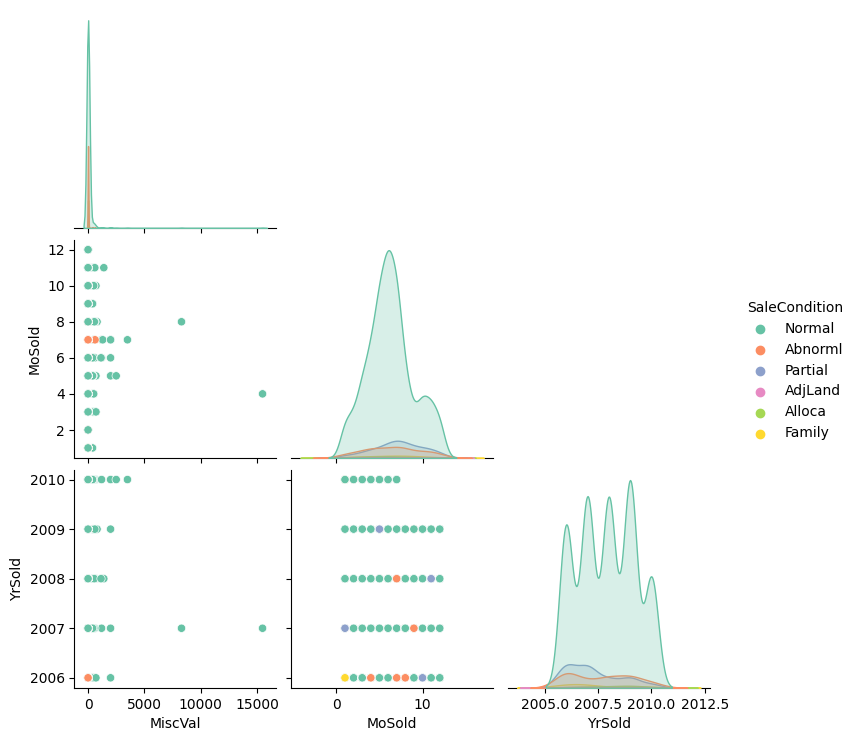

In [25]:
cols = ["MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition"]

sns.pairplot(df[cols], hue="SaleCondition", corner=True, palette="Set2", height=2.5)
plt.show()

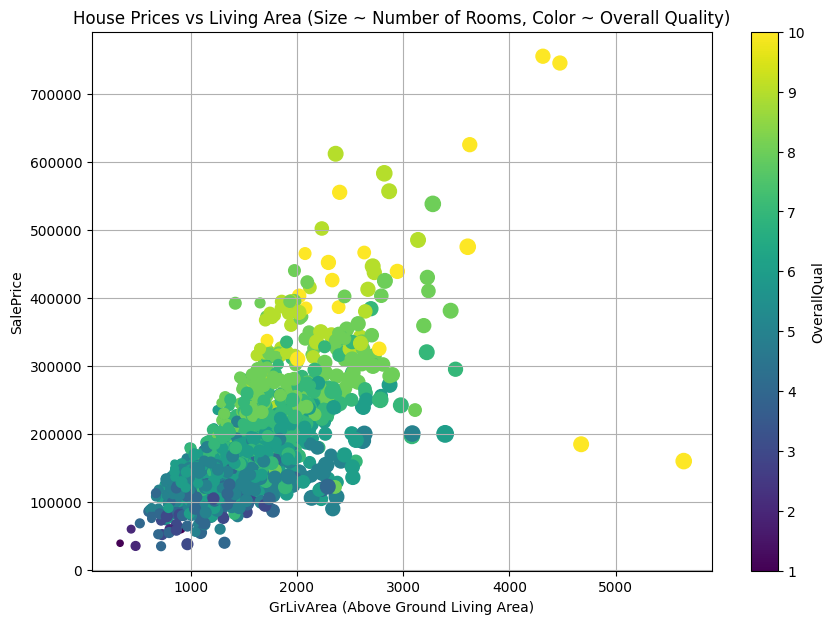

In [26]:
import matplotlib.pyplot as plt


df.plot(
    kind="scatter",
    x="GrLivArea",          
    y="SalePrice",        
    s=df["TotRmsAbvGrd"] * 10,  
    c="OverallQual",       
    cmap="viridis",      
    colorbar=True,
    legend=True,
    figsize=(10, 7),
    grid=True
)

plt.xlabel("GrLivArea (Above Ground Living Area)")
plt.ylabel("SalePrice")
plt.title("House Prices vs Living Area (Size ~ Number of Rooms, Color ~ Overall Quality)")
plt.show()
 

# Preprocessing

Before training the model, the dataset was preprocessed to make it suitable for machine learning. This involved handling missing values and encoding categorical data.

## Handling Missing Values
- Some columns contained `NaN` values.
- Missing values were filled with appropriate defaults or statistical values (mean, median, or mode) before encoding.

## Encoding Categorical Data
- **OneHotEncoder** was used to encode categorical columns.
- This was necessary because object/string type data needs to be converted into numeric form so that the machine can understand it.
- Applied mainly to nominal columns without intrinsic order, such as `Neighborhood`, `RoofStyle`, `SaleType`, etc.
- A separate column was created for each category with values 0 or 1.
- To avoid the dummy variable trap, the first category was dropped (`drop_first=True`).
- Columns of type `bool` resulting from one-hot encoding were later converted to integers (0/1) for model compatibility.

In [27]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [28]:
catfeatures = X.select_dtypes(include=['object']).columns
numfeatures = X.select_dtypes(exclude=['object']).columns

print(f"Counts of Numerical Columns: {len(catfeatures)}")
print(f"Counts of Categorica Columns: {len(numfeatures)}")

Counts of Numerical Columns: 43
Counts of Categorica Columns: 36


In [29]:
X[catfeatures] = X[catfeatures].fillna('Missing')
X[numfeatures] = X[numfeatures].fillna(0)
y = y.fillna(y.median())

In [30]:
X[numfeatures] = X[numfeatures].astype(float)
y = y.astype(float)

In [31]:
X.replace([np.inf, -np.inf], 0, inplace=True)
y.replace([np.inf, -np.inf], y.median(), inplace=True)

# Splitting Features and One-Hot Encoding Categorical Data

- Features were separated into numerical and categorical columns.  
- Categorical columns were converted to numeric using **One-Hot Encoding** so the model can understand them.  
  - `drop='first'` avoids the dummy variable trap.  
  - `handle_unknown='ignore'` prevents errors from unseen categories.  
- Numerical and encoded categorical features were combined to create the final dataset ready for training.

In [32]:
numfeatures = X.select_dtypes(exclude=['object']).columns
catfeatures = X.select_dtypes(include=['object']).columns

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
X_cat = pd.DataFrame(ohe.fit_transform(X[catfeatures]),
                     columns=ohe.get_feature_names_out(catfeatures))

X = pd.concat([X[numfeatures].reset_index(drop=True),
               X_cat.reset_index(drop=True)], axis=1)

In [33]:
print(f"X shape: {X.shape}")

X shape: (1460, 244)


# Train-Test Split and Model Training

- The dataset is split into **training** and **testing** sets to evaluate model performance.  
  - The training set is used to train the model.  
  - The testing set is used to evaluate how well the model generalizes to unseen data.  
- The machine learning model learns patterns and relationships from the numerical and one-hot encoded categorical features in the training set.  
- During training, the model optimizes its parameters to minimize prediction errors.  
- After training, the model is tested on the testing set to measure accuracy and performance metrics before deployment.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [36]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [37]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Ridge Regression Model

- The **Ridge Regression** model was used to predict the target values.  
- The model was trained using numerical and one-hot encoded categorical features.  
- Performance was evaluated using R² and RMSE metrics:

- **Train R²:** 0.9040, **Test R²:** 0.8923  
- **Train RMSE:** 23,929.13, **Test RMSE:** 28,746.26  

- These results indicate that the model performed well on both training and testing sets without significant overfitting.

In [38]:
r2_train = ridge.score(X_train, y_train)
r2_test = ridge.score(X_test, y_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Ridge Regression:")
print(f" Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f" Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")


Ridge Regression:
 Train R²: 0.9120, Test R²: 0.8786
 Train RMSE: 22908.92, Test RMSE: 30513.74


## Ridge Regression Predictions Visualization

- Predicted values for both training (`ridge_pred_train`) and testing (`ridge_pred_test`) sets are calculated using the trained Ridge model.  
- Scatter plots are created to compare **actual vs predicted** values:  
  - **Left plot:** Training set (y_train vs ridge_pred_train)  
  - **Right plot:** Testing set (y_test vs ridge_pred_test)  
- The red dashed line represents the ideal scenario where predicted values equal actual values.  
- This visualization helps to see how well the model's predictions align with the true values.

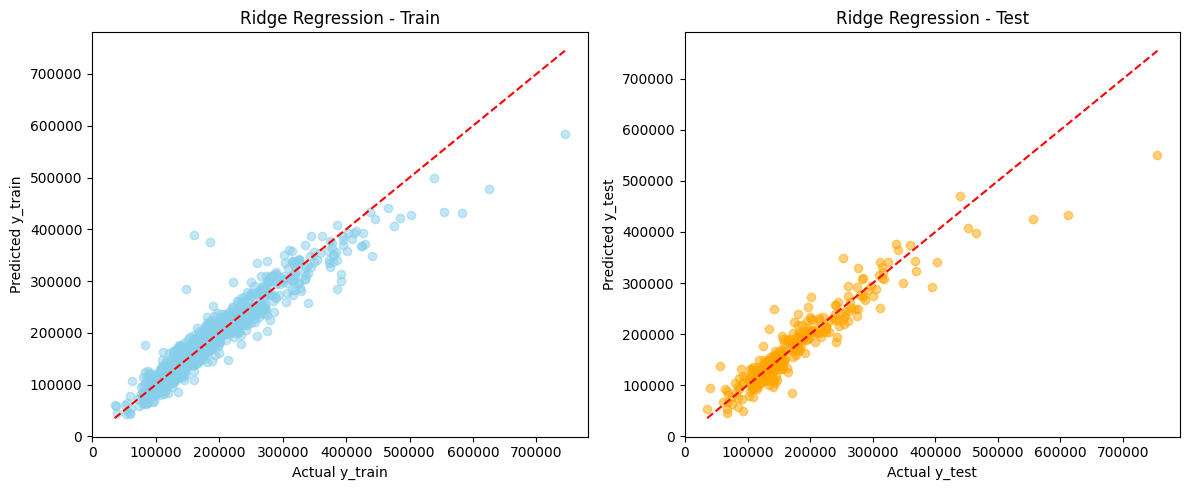

In [39]:
ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train, ridge_pred_train, alpha=0.5, color='skyblue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train')
plt.title('Ridge Regression - Train')

plt.subplot(1,2,2)
plt.scatter(y_test, ridge_pred_test, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual y_test')
plt.ylabel('Predicted y_test')
plt.title('Ridge Regression - Test')

plt.tight_layout()
plt.show()

# Random Forest Regression Model

- The **Random Forest Regression** model was used to predict the target values.  
- Performance on training and testing sets was evaluated using R² and RMSE:

- **Train R²:** 0.9787, **Test R²:** 0.8859  
- **Train RMSE:** 11,275.23, **Test RMSE:** 29,587.11  

- The results indicate that the model fits the training data very well, but the testing performance is slightly lower, suggesting a small degree of overfitting.

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [42]:
r2_train = rf.score(X_train, y_train)
r2_test = rf.score(X_test, y_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Random Forest Regression:")
print(f" Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f" Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")

Random Forest Regression:
 Train R²: 0.9789, Test R²: 0.8913
 Train RMSE: 11214.42, Test RMSE: 28871.66


## Random Forest Regression Predictions Visualization

- Predicted values for both training (`rf_pred_train`) and testing (`rf_pred_test`) sets are calculated using the trained Random Forest model.  
- Scatter plots are created to compare **actual vs predicted** values:  
  - **Left plot:** Training set (y_train vs rf_pred_train)  
  - **Right plot:** Testing set (y_test vs rf_pred_test)  
- The red dashed line represents the ideal scenario where predicted values equal actual values.  
- This visualization helps to assess how well the Random Forest model captures patterns and predicts target values.

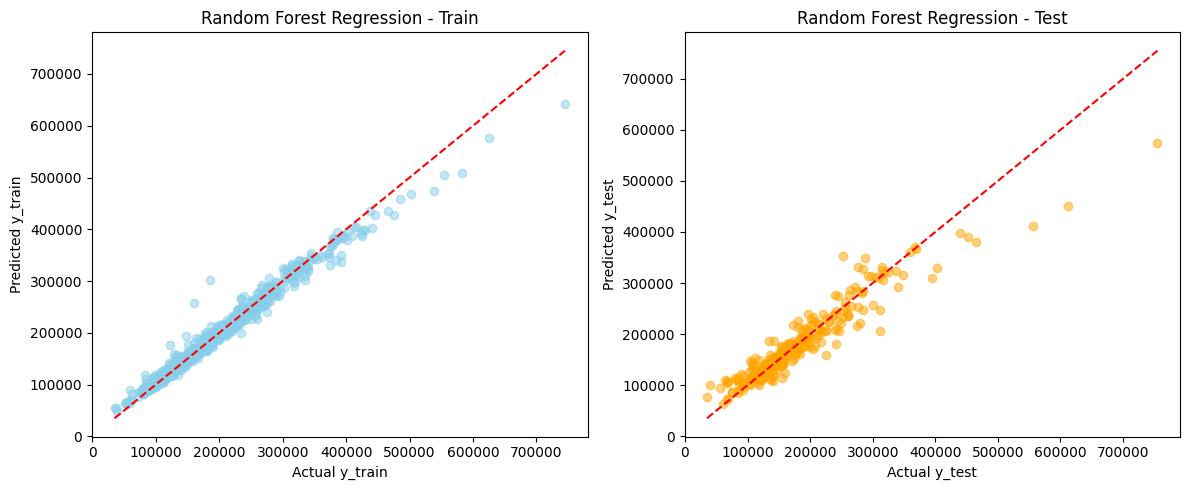

In [43]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train, rf_pred_train, alpha=0.5, color='skyblue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train')
plt.title('Random Forest Regression - Train')

plt.subplot(1,2,2)
plt.scatter(y_test, rf_pred_test, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual y_test')
plt.ylabel('Predicted y_test')
plt.title('Random Forest Regression - Test')

plt.tight_layout()
plt.show()

# Using Test File for Random Forest Model Evaluation

- A separate test file, **already imported in the Import section**, was used to evaluate the **Random Forest Regression** model.  
- Using this independent test dataset allows for more accurate assessment of the model's predictive performance.  
- This approach helps measure the model's error on unseen data, ensuring reliable predictions and minimizing overfitting.  

[Link to Test File in Import Section](#Importing-Files-and-Libraries)

## Preparing the Test Dataset

- Numerical and categorical features are separated.  
- Missing values are filled (0 for numeric, 'Missing' for categorical).  
- Categorical features are encoded using the previously fitted OneHotEncoder.  
- Numerical and encoded categorical features are combined, and any missing columns are added with zeros.  
- Columns are reordered to match the training dataset, resulting in the final test set ready for prediction.


In [44]:
numfeatures = test.select_dtypes(exclude=['object']).columns
catfeatures = test.select_dtypes(include=['object']).columns

test[numfeatures] = test[numfeatures].fillna(0)
test[catfeatures] = test[catfeatures].fillna('Missing')

test_cat = pd.DataFrame(ohe.transform(test[catfeatures]),
                        columns=ohe.get_feature_names_out(catfeatures))

X_test_final = pd.concat([test[numfeatures].reset_index(drop=True),
                          test_cat.reset_index(drop=True)], axis=1)

In [45]:
for c in X_train.columns:
    if c not in X_test_final.columns:
        X_test_final[c] = 0

X_test_final = X_test_final[X_train.columns]

## Random Forest Prediction on Test File

- A **Random Forest Regressor** is trained on the training dataset (`X_train`, `y_train`).  
- Predictions are made on the separate test dataset (`X_test_final`).  
- The first 10 predicted values are displayed using `print`.  
- Note: This step performs prediction only; model evaluation (e.g., R², RMSE) is not calculated here.

In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test_final)

print("Random Forest Predictions:", rf_pred_test[:10])

Random Forest Predictions: [129368.5  153877.   180283.53 187903.7  207195.12 182901.17 172567.45
 177700.67 181633.65 120571.  ]


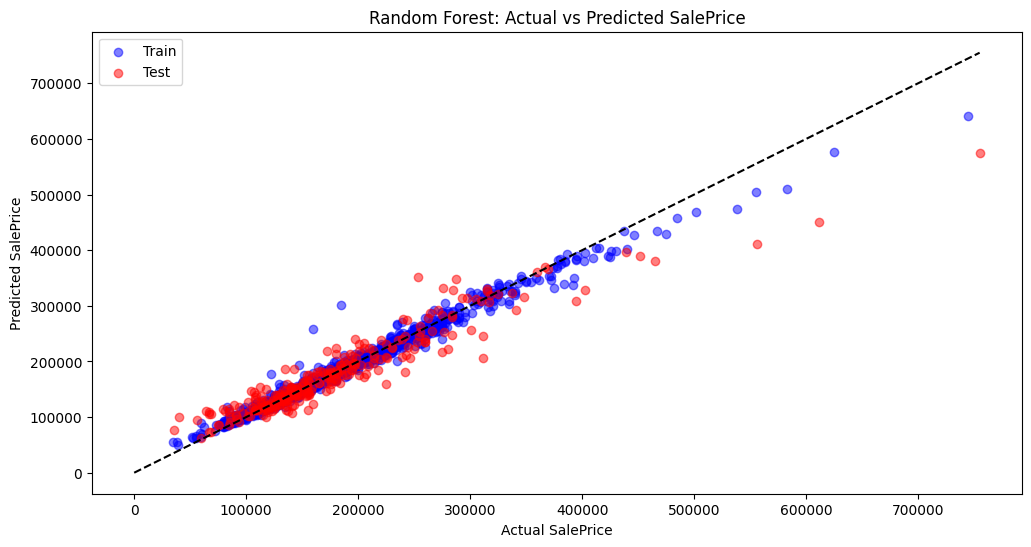

In [47]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

plt.figure(figsize=(12,6))

plt.scatter(y_train, rf_train_pred, color='blue', alpha=0.5, label='Train')
plt.scatter(y_test, rf_test_pred, color='red', alpha=0.5, label='Test')

max_val = max(y_train.max(), y_test.max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Actual vs Predicted SalePrice")
plt.legend()
plt.show()

# Creating Submission File for Kaggle

- A submission DataFrame is created with two columns:  
  - `"Id"`: the identifier from the test dataset  
  - `"SalePrice"`: the predicted prices from the Random Forest model (`rf_pred_test`)  
- The DataFrame is saved as a CSV file named `"submission_rf.csv"` without the index.  
- This file can be uploaded directly to Kaggle for submission.  

In [48]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": rf_pred_test
})

submission.to_csv("submission_rf.csv", index=False)
print("CSV for Kaggle submission saved as 'submission_rf.csv'")


CSV for Kaggle submission saved as 'submission_rf.csv'
